# Лабораторная работа 6. 
# Сетевые алгоритмы. Динамические алгоритмы поиска путей.


## Выполнил студент группы ФИО ГРУППА
***

### Задание

1.  Реализовать алгоритм поиска кратчайшего расстояния между двумя вершинами ориентированного взвешенного графа в соответствии с вариантом. 

2.  Предусмотреть задание графа в виде матрицы смежности/инцидентности, читаемой из файла, либо графически с помощью пользовательского интерфейса. 

3.  Разработать графический интерфейс пользователя с визуализацией графа и отображением кратчайшего расстояния между задаваемыми пользователем вершинами.

4. По результатам работы проанализировать временную сложность работы заданного алгоритма в зависимости от числа узлов и ребер графа.
Данные представить в виде таблицы.



### Алгоритмы:

Алгоритм Флойда-Уоршелла| Алгоритм Дейкстры | Алгоритм Беллмана-Форда | Алгоритм Джонсона| Алгоритм Левита | Алгоритм Йена



### Выполнение:

In [3]:
import copy
import math
import random
import time

import networkx as nx
import matplotlib.pyplot as plt

path_1 = "Files for Lab6/adj_matrix.txt"
path_2 = "Files for Lab6/adj_matrix(negative).txt"

#### Создание матрицы

In [4]:
# Из файла:
def create_adj_matrix(path):
    matrix = []
    with open(path, "r") as file:
        for line in file:
            matrix.append(list(map(str, line.replace("\n", "").split(" "))))
    for i in matrix:
        for j in range(len(i)):
            if i[j] == "inf":
                i[j] = math.inf
            else:
                i[j] = int(i[j])
    return matrix
# Рандомно:
def generate_matrix(size):
    matrix = [[(0 if random.randint(0, 1) != 1 or i == j else random.randint(1, 15))for i in range(size)] for j in range(size)]
    return matrix

def generate_matrix_negative(size):
    matrix = [[(math.inf if random.randint(0, 1) != 1 or i == j else random.randint(-10, 15))for i in range(size)] for j in range(size)]
    return matrix

#### Создание графа

In [5]:
# Граф из матрицы:
def create_graph(matrix):
    graph = nx.DiGraph()
    for i in range(1, len(matrix)):
        graph.add_node(i)
    for line in range(len(matrix)):
        for element in range(len(matrix)):
            if matrix[line][element] != math.inf:
                graph.add_edge(line + 1, element + 1, weight=matrix[line][element], label=matrix[line][element])
    for edge in graph.edges():
        graph.edges[edge]['color'] = 'blue'
    return graph

# Визуализация графа:
def draw_graph(graph, matrix, path = None):
    defolt_color = "purple"
    path_color = "red"
    path_edge = []
    edge_colors = [defolt_color]
    node_colors = [defolt_color]
    if path:
        edge_colors = []
        node_colors = []
        for i in range(len(matrix)):
            if i + 1 in path:
                node_colors.append(path_color)
            else:
                node_colors.append(defolt_color)
        for i in range(len(path) - 1):
            path_edge.append((path[i], path[i + 1]))
        for i in range(len(matrix)):
            for j in range(len(matrix)):
                if matrix[i][j] != math.inf:
                    if (i + 1, j + 1) not in path_edge:
                        edge_colors.append(defolt_color)
                    else:
                        edge_colors.append(path_color)
    pos = nx.circular_layout(graph)
    labels = nx.get_edge_attributes(graph, 'weight')
    nx.draw_networkx_nodes(graph, node_color = node_colors, node_size = 200, pos = pos, alpha = 0.5)
    nx.draw_networkx_edges(graph,edge_color = edge_colors, pos = pos, arrowstyle = 'simple, tail_width=0.02', alpha = 0.5)
    nx.draw_networkx_labels(graph, pos = pos, font_size = 8, verticalalignment = 'center_baseline')
    nx.draw_networkx_edge_labels(graph, pos = pos, edge_labels = labels, font_size = 8, verticalalignment = 'baseline')
    plt.show()

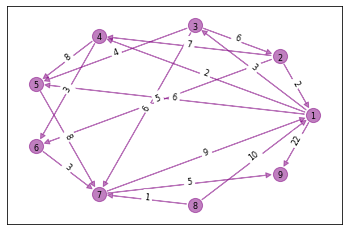

In [6]:
matrix = create_adj_matrix(path_1)
G = create_graph(matrix)
draw_graph(G, matrix)

#### Алгоритм Флойда-Уоршелла

In [7]:
def get_path(P, v, u):
    v -= 1
    u -= 1
    path = [v]
    while v != u:
        v = P[v][u]
        path.append(v)
    path = [el + 1 for el in path]
    return path


def floyd(matrix, start, end): #Сложность = n^3
    V = copy.deepcopy(matrix)
    for i in range(len(matrix)):
        for j in range(len(matrix[i])):
            if matrix[i][j] == math.inf and i == j:
                V[i][j] = 0
            else:
                V[i][j] == matrix[i][j]
    N = len(V)
    P = [[0 for i in range(N)] for j in range(N)]

    for i in range(N):
        for j in range(N):
            if V[i][j] != math.inf:
                P[i][j] = j
    for i in range(N):
        for j in range(N):
            if i == j: continue
            if V[i][j] != math.inf:
                for k in range(N):
                    if i == k or j == k: continue
                    if V[i][k] > V[i][j] + V[j][k]:
                        V[i][k] = V[i][j] + V[j][k]
                        P[i][k] = P[i][j]
    path = get_path(P, start, end)
    return path

##### Результат

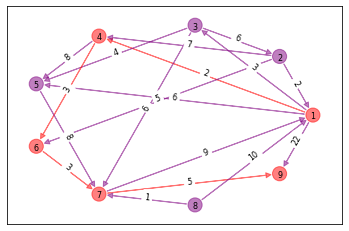

In [8]:
G_floyd = copy.copy(G)
matrix = create_adj_matrix(path_1)
path = floyd(matrix, 1, 9)
draw_graph(G_floyd,matrix, path)

##### Тесты

In [9]:
tests = []
for i in range(10, 20):
    matrix = generate_matrix(i)
    node_counts = len(matrix)
    edge_counts = 0
    for i in range(len(matrix)):
        for j in range(len(matrix)):
            if matrix[i][j] != 0:
                edge_counts += 1
    start = time.time()
    path = floyd(matrix, random.randint(0, i//2), random.randint(i//2, i))
    floyd_time = round((time.time() - start) * 1000000)
    tests.append([node_counts, edge_counts, floyd_time])
tests.sort(key=lambda time : time[2])
for i in range(len(tests)):
    print("Тест", str(i+1)+": \t", "узлы:", tests[i][0], "\tграни:", tests[i][1], "\tвремя:", tests[i][2], "mks")

Тест 1: 	 узлы: 10 	грани: 38 	время: 0 mks
Тест 2: 	 узлы: 15 	грани: 97 	время: 993 mks
Тест 3: 	 узлы: 13 	грани: 70 	время: 996 mks
Тест 4: 	 узлы: 11 	грани: 52 	время: 1000 mks
Тест 5: 	 узлы: 14 	грани: 99 	время: 1003 mks
Тест 6: 	 узлы: 12 	грани: 62 	время: 1007 mks
Тест 7: 	 узлы: 16 	грани: 128 	время: 1011 mks
Тест 8: 	 узлы: 17 	грани: 145 	время: 1998 mks
Тест 9: 	 узлы: 18 	грани: 167 	время: 2006 mks
Тест 10: 	 узлы: 19 	грани: 189 	время: 3001 mks


#### Алгоритм Дейкстры

In [10]:
def get_link_v(v, D):
    arr = []
    res = []
    for i in range(len(D[v])):
        if D[v][i] != math.inf:
            arr.append([i, D[v][i]])
    arr.sort(key= lambda value: value[1])
    for i in range(len(arr)):
        res.append(arr[i][0])
    return res


def arg_min(T, S):
    amin = -1
    m = max(T)
    for i, t in enumerate(T):
        if t < m and i not in S:
            m = t
            amin = i
    return amin


def dijkstra(matrix, start, end):
    D = copy.deepcopy(matrix)
    N = len(D) # число вершин
    T = [math.inf]*N
    P = [[math.inf]for i in range(N)]
    v = start - 1 # Стартовая вершина
    S = [v] # просмотренные вершины
    T[v] = 0 # нулевой вес для стартовой вершины
    node = end - 1
    path = [end]
    while v != -1:
        for j in get_link_v(v, D):
            if j not in S:
                w = T[v] + D[v][j]
                if w < T[j]:
                    T[j] = w
                    P[j] = v
        v = arg_min(T, S)
        if v >= 0:
            S.append(v)
    if T[end - 1] == math.inf:
        return None
    else:
        while node != start - 1:
            path.append(P[node]+1)
            node = P[node]
    return path[::-1], T[end - 1]

##### Результат

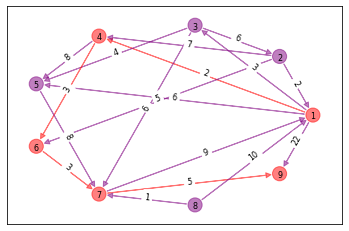

In [12]:
G_dijkstra = copy.copy(G)
matrix = create_adj_matrix(path_1)
path, d = dijkstra(matrix, 1, 9)
draw_graph(G_dijkstra,matrix, path)

##### Тесты

In [20]:
tests = []
for i in range(10, 20):
    matrix = generate_matrix(i)
    node_counts = len(matrix)
    edge_counts = 0
    for i in range(len(matrix)):
        for j in range(len(matrix)):
            if matrix[i][j] != 0:
                edge_counts += 1
    start = time.time()
    path, d = dijkstra(matrix, random.randint(1, i//2), random.randint(i//2 + 1, i))
    dijkstra_time = round((time.time() - start) * 1000000)
    tests.append([node_counts, edge_counts, dijkstra_time])
tests.sort(key=lambda time : time[2])
for i in range(len(tests)):
    print("Тест", str(i+1)+": \t", "узлы:", tests[i][0], "\tграни:", tests[i][1], "\tвремя:", tests[i][2], "mks")

Тест 1: 	 узлы: 11 	грани: 57 	время: 0 mks
Тест 2: 	 узлы: 12 	грани: 57 	время: 0 mks
Тест 3: 	 узлы: 13 	грани: 83 	время: 0 mks
Тест 4: 	 узлы: 14 	грани: 87 	время: 0 mks
Тест 5: 	 узлы: 15 	грани: 107 	время: 0 mks
Тест 6: 	 узлы: 19 	грани: 158 	время: 0 mks
Тест 7: 	 узлы: 17 	грани: 133 	время: 997 mks
Тест 8: 	 узлы: 18 	грани: 164 	время: 1000 mks
Тест 9: 	 узлы: 16 	грани: 122 	время: 1001 mks
Тест 10: 	 узлы: 10 	грани: 47 	время: 1019 mks


#### Алгоритм Беллмана-Форда

In [21]:
def get_link_b(v, D):
    arr = []
    res = []
    for i in range(len(D[v])):
        if D[v][i] != math.inf:
            arr.append([i, D[v][i]])
    arr.sort(key= lambda value: value[1])
    for i in range(len(arr)):
        res.append(arr[i][0])
    return res


def bellman(matrix, start, end):
    D = copy.copy(matrix)
    N = len(D)  # число вершин
    dist = [math.inf] * N
    P = [math.inf for i in range(N)]
    v = start - 1  # Стартовая вершина
    dist[v] = 0  # нулевой вес для стартовой вершины
    node = end - 1
    path = [end]
    check = True

    for i in range(N - 1):
        for v in range(N):
            for u in get_link_b(v, D):
                if dist[u] > dist[v] + D[v][u]:
                    dist[u] = dist[v] + D[v][u]
                    P[u] = v

    for v in range(N):
        for u in get_link_b(v, D):
            if dist[u] > dist[v] + D[v][u]:
                print("Graph contains negative weight cycle")
                check = False
                break
    if check:
        while node != start - 1:
            path.append(P[node]+1)
            node = P[node]

    return path[::-1], dist

##### Результат

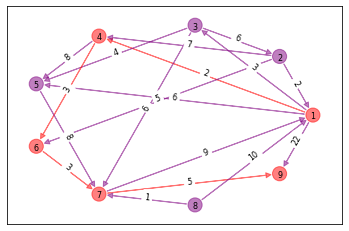

In [22]:
G_bellman = copy.copy(G)
matrix = create_adj_matrix(path_1)
path = bellman(matrix, 1, 9)[0]
draw_graph(G_bellman, matrix, path)

##### Тесты

In [23]:
tests = []
for i in range(10, 20):
    matrix = generate_matrix(i)
    node_counts = len(matrix)
    edge_counts = 0
    for i in range(len(matrix)):
        for j in range(len(matrix)):
            if matrix[i][j] != 0:
                edge_counts += 1
    start = time.time()
    path = bellman(matrix, random.randint(1, i//2), random.randint(i//2 + 1, i))
    bellman_time = round((time.time() - start) * 1000000)
    tests.append([node_counts, edge_counts, bellman_time])
tests.sort(key=lambda time : time[2])
for i in range(len(tests)):
    print("Тест", str(i+1)+": \t", "узлы:", tests[i][0], "\tграни:", tests[i][1], "\tвремя:", tests[i][2], "mks")

Тест 1: 	 узлы: 12 	грани: 65 	время: 986 mks
Тест 2: 	 узлы: 10 	грани: 48 	время: 997 mks
Тест 3: 	 узлы: 11 	грани: 58 	время: 1000 mks
Тест 4: 	 узлы: 13 	грани: 73 	время: 1999 mks
Тест 5: 	 узлы: 14 	грани: 90 	время: 2000 mks
Тест 6: 	 узлы: 16 	грани: 126 	время: 3003 mks
Тест 7: 	 узлы: 15 	грани: 111 	время: 3009 mks
Тест 8: 	 узлы: 17 	грани: 141 	время: 3994 mks
Тест 9: 	 узлы: 18 	грани: 153 	время: 5001 mks
Тест 10: 	 узлы: 19 	грани: 168 	время: 5001 mks


#### Алгоритм Джонсона

In [25]:
def jonsons(matrix, graph, start, end):
    D = copy.copy(matrix)
    N = len(D)
    j_graph = copy.deepcopy(graph)
    j_graph.add_node(N + 1)
    for i in range(1, N + 1):
        j_graph.add_edge(N + 1, i, weight=0, label=0)
    D.append([0] * N)
    for i in range(len(D)):
        D[i].append(0)
    N = len(D)
    for i in range(N):
        for j in range(len(D[i])):
            if D[i][j] == 0 and ((i + 1, j + 1) not in j_graph.edges):
                D[i][j] = math.inf

    h = bellman(D, N, end)[1]
    for i in range(N):
        D[i].pop()
    D.pop()
    N = len(D)
    for i in range(N):
        for j in get_link_b(i, D):
            D[i][j] = D[i][j] + h[i] - h[j]
    j_graph = create_graph(D)

    draw_graph(j_graph, D)

    path, d = dijkstra(D, start, end)


    return path

##### Результат

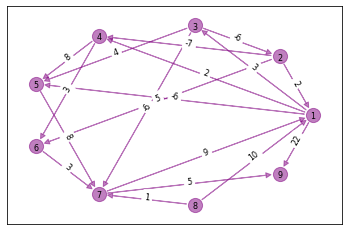

Граф с пересчитанными ребрами:
Graph contains negative weight cycle


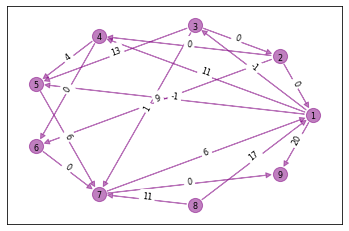

Итог:


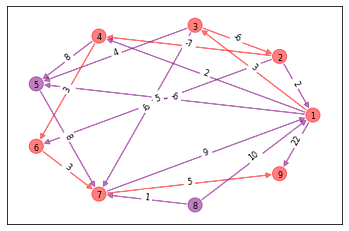

In [26]:
matrix = create_adj_matrix(path_2)
G_jonsons = create_graph(matrix)
draw_graph(G_jonsons, matrix)
print("Граф с пересчитанными ребрами:")
path = jonsons(matrix, G_jonsons, 1, 9)
print("Итог:")
draw_graph(G_jonsons, matrix, path)

##### Тесты

Graph contains negative weight cycle
Graph contains negative weight cycle
Graph contains negative weight cycle
Graph contains negative weight cycle
Graph contains negative weight cycle
Graph contains negative weight cycle
Graph contains negative weight cycle


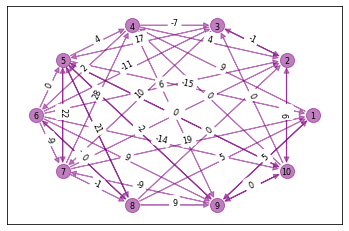

Graph contains negative weight cycle
Graph contains negative weight cycle
Graph contains negative weight cycle
Graph contains negative weight cycle
Graph contains negative weight cycle
Graph contains negative weight cycle
Graph contains negative weight cycle


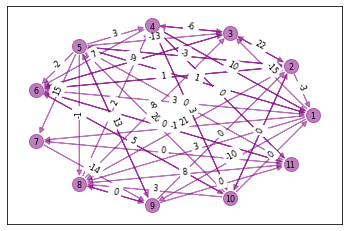

Graph contains negative weight cycle
Graph contains negative weight cycle
Graph contains negative weight cycle
Graph contains negative weight cycle
Graph contains negative weight cycle
Graph contains negative weight cycle


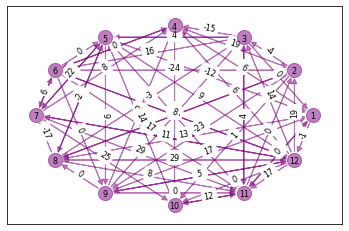

Graph contains negative weight cycle
Graph contains negative weight cycle
Graph contains negative weight cycle
Graph contains negative weight cycle
Graph contains negative weight cycle
Graph contains negative weight cycle
Graph contains negative weight cycle


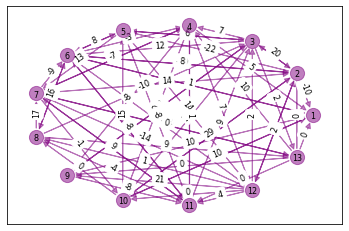

Graph contains negative weight cycle
Graph contains negative weight cycle
Graph contains negative weight cycle
Graph contains negative weight cycle
Graph contains negative weight cycle
Graph contains negative weight cycle
Graph contains negative weight cycle
Graph contains negative weight cycle
Graph contains negative weight cycle
Graph contains negative weight cycle
Graph contains negative weight cycle


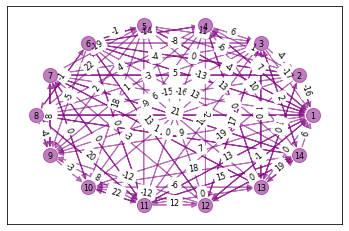

Graph contains negative weight cycle
Graph contains negative weight cycle
Graph contains negative weight cycle
Graph contains negative weight cycle
Graph contains negative weight cycle
Graph contains negative weight cycle
Graph contains negative weight cycle
Graph contains negative weight cycle
Graph contains negative weight cycle


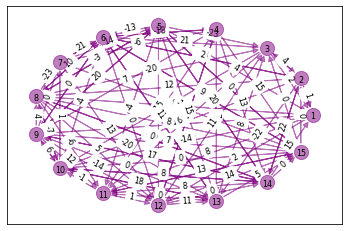

Graph contains negative weight cycle
Graph contains negative weight cycle
Graph contains negative weight cycle
Graph contains negative weight cycle
Graph contains negative weight cycle
Graph contains negative weight cycle
Graph contains negative weight cycle
Graph contains negative weight cycle
Graph contains negative weight cycle
Graph contains negative weight cycle
Graph contains negative weight cycle


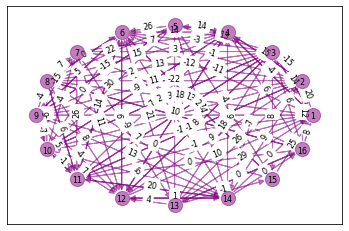

Graph contains negative weight cycle
Graph contains negative weight cycle
Graph contains negative weight cycle
Graph contains negative weight cycle
Graph contains negative weight cycle
Graph contains negative weight cycle
Graph contains negative weight cycle
Graph contains negative weight cycle
Graph contains negative weight cycle
Graph contains negative weight cycle
Graph contains negative weight cycle
Graph contains negative weight cycle
Graph contains negative weight cycle


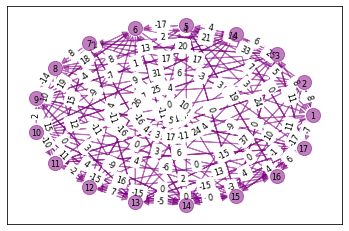

Graph contains negative weight cycle
Graph contains negative weight cycle
Graph contains negative weight cycle
Graph contains negative weight cycle
Graph contains negative weight cycle
Graph contains negative weight cycle
Graph contains negative weight cycle
Graph contains negative weight cycle
Graph contains negative weight cycle
Graph contains negative weight cycle
Graph contains negative weight cycle
Graph contains negative weight cycle
Graph contains negative weight cycle


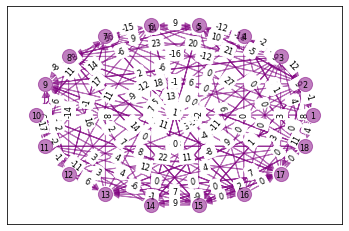

Graph contains negative weight cycle
Graph contains negative weight cycle
Graph contains negative weight cycle
Graph contains negative weight cycle
Graph contains negative weight cycle
Graph contains negative weight cycle
Graph contains negative weight cycle
Graph contains negative weight cycle
Graph contains negative weight cycle
Graph contains negative weight cycle
Graph contains negative weight cycle
Graph contains negative weight cycle
Graph contains negative weight cycle
Graph contains negative weight cycle
Graph contains negative weight cycle


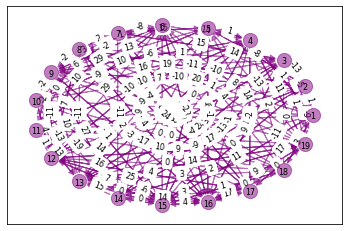

Тест 1: 	 узлы: 10 	грани: 97 	время: 1257 ms
Тест 2: 	 узлы: 11 	грани: 119 	время: 1482 ms
Тест 3: 	 узлы: 12 	грани: 141 	время: 1715 ms
Тест 4: 	 узлы: 13 	грани: 169 	время: 2210 ms
Тест 5: 	 узлы: 15 	грани: 220 	время: 2663 ms
Тест 6: 	 узлы: 14 	грани: 191 	время: 2699 ms
Тест 7: 	 узлы: 16 	грани: 254 	время: 2961 ms
Тест 8: 	 узлы: 17 	грани: 286 	время: 3652 ms
Тест 9: 	 узлы: 18 	грани: 319 	время: 4106 ms
Тест 10: 	 узлы: 19 	грани: 354 	время: 4618 ms


In [56]:
tests = []
for i in range(10, 20):
    matrix = generate_matrix_negative(i)
    j_graph = create_graph(matrix)
    node_counts = len(matrix)
    edge_counts = 0
    for i in range(len(matrix)):
        for j in range(len(matrix)):
            if matrix[i][j] != 0:
                edge_counts += 1
    start = time.time()
    path = jonsons(matrix, j_graph, random.randint(1, i//2), random.randint(i//2 + 1, i))
    jonsons_time = round((time.time() - start) * 1000)
    tests.append([node_counts, edge_counts, jonsons_time])
tests.sort(key=lambda time : time[2])
for i in range(len(tests)):
    print("Тест", str(i+1)+": \t", "узлы:", tests[i][0], "\tграни:", tests[i][1], "\tвремя:", tests[i][2], "ms")

#### Алгоритм Левита

In [27]:
def levit(matrix, start, end):
    D = copy.deepcopy(matrix)
    N = len(D)
    que_0 = []
    que_1_d = []
    que_1_f = []
    que_2 = []
    que_3 = []
    counter = [0] * N
    dist = [math.inf] * N
    v = start - 1  # Стартовая вершина
    dist[v] = 0  # нулевой вес для стартовой вершины
    P = [math.inf for i in range(N)]
    node = end - 1
    path = [end]

    for i in range(N):
        if i != v:
            que_2.append(i)
        else:
            que_1_d.append(i)

    while que_1_d or que_1_f:
        if que_1_f:
            u = que_1_f.pop(0)
        else:
            u = que_1_d.pop(0)
        for v in get_link_b(u, D):
            if v in que_2:
                que_1_d.append(que_2.pop(que_2.index(v)))
                dist[v] = dist[u] + D[u][v]
                P[v] = u
            elif v in que_1_d or v in que_1_f:
                dist[v] = min(dist[v], dist[u] + D[u][v])
            elif v in que_0:
                if dist[v] > dist[u] + D[u][v]:
                    dist[v] = dist[u] + D[u][v]
                    P[v] = u
                    que_1_f.append(que_0.pop(que_0.index(v)))
                    counter[v] += 1
        que_0.append(u)
        if counter[u] > N + 5:
            que_3.append(que_0.pop(que_0.index(u)))
    if end not in que_2:
        while node != start - 1:
            path.append(P[node] + 1)
            node = P[node]

    return path[::-1]

##### Результат

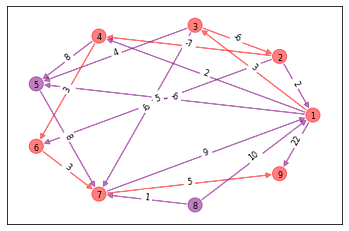

In [28]:
matrix = create_adj_matrix(path_2)
G_levit = create_graph(matrix)
path = levit(matrix, 1, 9)
draw_graph(G_levit, matrix, path)

##### Тесты

In [65]:
tests = []
for i in range(10, 20):
    matrix = generate_matrix(i)
    node_counts = len(matrix)
    edge_counts = 0
    for i in range(len(matrix)):
        for j in range(len(matrix)):
            if matrix[i][j] != 0:
                edge_counts += 1
    start = time.time()
    path = levit(matrix, random.randint(1, i//2), random.randint(i//2 + 1, i))
    levit_time = round((time.time() - start) * 1000000)
    tests.append([node_counts, edge_counts, levit_time])
tests.sort(key=lambda time : time[2])
for i in range(len(tests)):
    print("Тест", str(i+1)+": \t", "узлы:", tests[i][0], "\tграни:", tests[i][1], "\tвремя:", tests[i][2], "mks")

Тест 1: 	 узлы: 11 	грани: 52 	время: 0 mks
Тест 2: 	 узлы: 14 	грани: 89 	время: 0 mks
Тест 3: 	 узлы: 15 	грани: 100 	время: 0 mks
Тест 4: 	 узлы: 18 	грани: 153 	время: 0 mks
Тест 5: 	 узлы: 12 	грани: 60 	время: 998 mks
Тест 6: 	 узлы: 17 	грани: 132 	время: 999 mks
Тест 7: 	 узлы: 16 	грани: 113 	время: 1000 mks
Тест 8: 	 узлы: 19 	грани: 160 	время: 1000 mks
Тест 9: 	 узлы: 10 	грани: 48 	время: 1002 mks
Тест 10: 	 узлы: 13 	грани: 82 	время: 1011 mks


#### Алгоритм Йена

In [29]:
def yen(matrix, start, end):
    D = copy.deepcopy(matrix)
    global paths
    res = dijkstra(D, start, end)
    if res and res not in paths:
        paths.append(res)
        for i in range(len(paths[0][0])-1):
            invalid_matrix = copy.deepcopy(D)
            invalid_matrix[paths[0][0][i] - 1][paths[0][0][i + 1] - 1] = math.inf
            yen(invalid_matrix, start, end)

    return paths

##### Результат

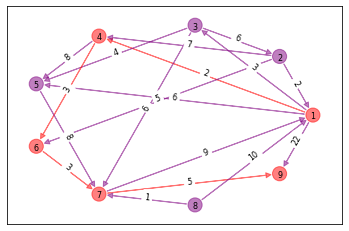

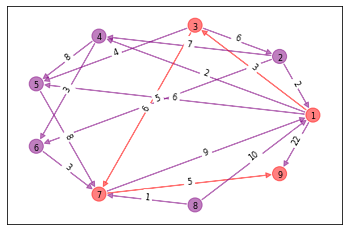

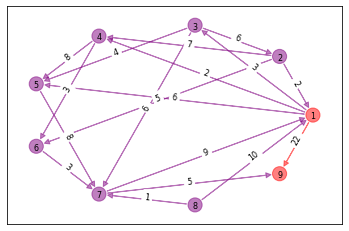

In [30]:
matrix = create_adj_matrix(path_1)
G_yen = create_graph(matrix)
paths = []
path = yen(matrix, 1, 9)
path.sort(key=lambda lenght: lenght[1])
for i in path:
    draw_graph(G_yen, matrix, i[0])

##### Тесты

In [31]:
tests = []
for i in range(10, 20):
    matrix = generate_matrix(i)
    node_counts = len(matrix)
    edge_counts = 0
    for i in range(len(matrix)):
        for j in range(len(matrix)):
            if matrix[i][j] != 0:
                edge_counts += 1
    start = time.time()
    path = yen(matrix, random.randint(1, i//2), random.randint(i//2 + 1, i))
    yen_time = round((time.time() - start) * 1000000)
    tests.append([node_counts, edge_counts, yen_time])
tests.sort(key=lambda time : time[2])
for i in range(len(tests)):
    print("Тест", str(i+1)+": \t", "узлы:", tests[i][0], "\tграни:", tests[i][1], "\tвремя:", tests[i][2], "mks")

Тест 1: 	 узлы: 10 	грани: 39 	время: 1003 mks
Тест 2: 	 узлы: 13 	грани: 78 	время: 1993 mks
Тест 3: 	 узлы: 12 	грани: 56 	время: 2000 mks
Тест 4: 	 узлы: 14 	грани: 89 	время: 2000 mks
Тест 5: 	 узлы: 11 	грани: 49 	время: 2991 mks
Тест 6: 	 узлы: 15 	грани: 109 	время: 3002 mks
Тест 7: 	 узлы: 19 	грани: 171 	время: 3989 mks
Тест 8: 	 узлы: 16 	грани: 121 	время: 3998 mks
Тест 9: 	 узлы: 17 	грани: 140 	время: 4007 mks
Тест 10: 	 узлы: 18 	грани: 148 	время: 4997 mks


### Вывод